In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
import sys
df1 = pd.read_csv('starttime_20190826150142.log', sep=',', header=None, 
                  names=["framework", "jvmversion", "startuptime"])
# set width of bar
barWidth = 0.15

In [2]:
framework_dict={'hse':'Helidon SE','qs':'Quarkus','vertx':'Vert.x','mn':'Micronaut','none':'No framework','mp':'Microprofile','sb':'Spring Boot','sbreactive':'WebFlux','sbfu':'Spring Fu','akka':'Akka'}
jvmversion_dict={'11':'OpenJDK 11.0.4','8openj9':'OpenJ9 JDK 8u222','8openjdk':'OpenJDK 8u222','8oracle':'Oracle JDK 8u221','svm':'Substrate VM'}
order_per_framework={'none':1, 'vertx':2, 'hse':3, 'qs':4, 'sbfu':7, 'sbreactive':9, 'mn':5, 'sb':8, 'mp':10, 'akka':6 }
df1['order_per_framework'] = df1['framework'].map(order_per_framework)
df1c=df1.groupby(['jvmversion'])['startuptime']
avg_per_jvm=(df1c.mean().to_dict())
df1['avg_per_jvmversion'] = df1['jvmversion'].map(avg_per_jvm)
df1['framework'] = df1['framework'].map(framework_dict)
df1['jvmversion'] = df1['jvmversion'].map(jvmversion_dict)
df1=df1.groupby(['framework','jvmversion','order_per_framework','avg_per_jvmversion']).agg({'startuptime':['mean','std']})

#for item in df1.framework.unique():
#    if (len(df1.loc[(df1['jvmversion']=='Substrate VM') & (df1['framework']==item)]) == 0):
#            df2=pd.DataFrame({"framework":[item], "jvmversion":['Substrate VM'],'mean':[0],'std':[0],'avg_per_jvmversion':[0],'order_per_framework':[0]})
#            df1.append(df2)

df1=df1.sort_values(['order_per_framework','jvmversion'], ascending=[True, True])
df1=df1.startuptime.reset_index()
df1=df1.drop(['order_per_framework','avg_per_jvmversion'], axis=1)
df1

,framework,jvmversion,mean,std
0,Vert.x,OpenJ9 JDK 8u222,363.9,17.916163
1,Vert.x,OpenJDK 11.0.4,458.0,16.048537
2,Vert.x,OpenJDK 8u222,417.8,22.812277
3,Vert.x,Oracle JDK 8u221,434.1,12.810152
4,Helidon SE,OpenJ9 JDK 8u222,260.9,22.970754
5,Helidon SE,OpenJDK 11.0.4,419.7,14.422590
6,Helidon SE,OpenJDK 8u222,418.0,11.294050
7,Helidon SE,Oracle JDK 8u221,417.9,17.019270
8,Helidon SE,Substrate VM,10.5,0.527046
9,Quarkus,OpenJ9 JDK 8u222,401.3,23.888863


In [3]:
ind = np.arange(len(df1.framework.unique()))
#based on https://python-graph-gallery.com/11-grouped-barplot/
#calculate bar location. rowloc[0] is the location for the first bar in every group (group=keys from framework_dict)
rowloc=[]
rowloc.append(np.arange(len(df1.framework.unique())))
for item in range(1,(len(df1.jvmversion.unique()))):
    rowloc.append([x + barWidth for x in rowloc[item-1]])

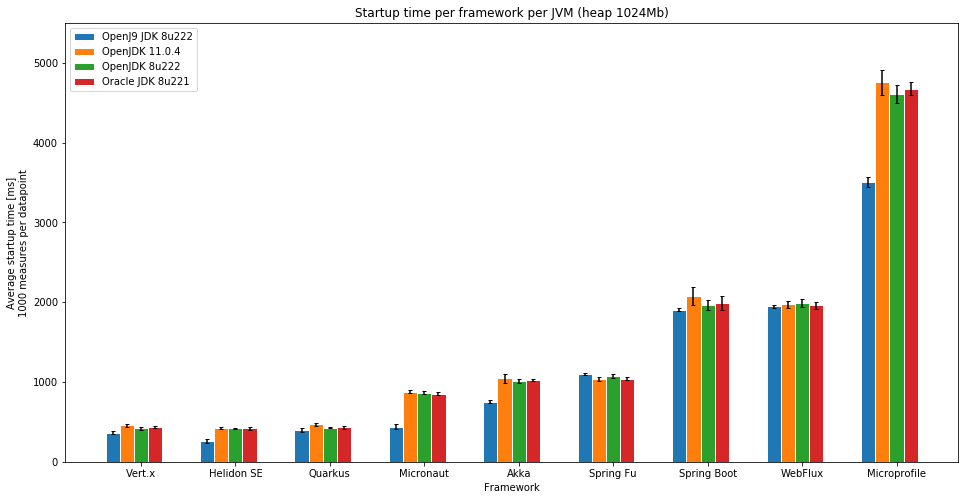

In [4]:
plt.xlabel('Framework')
plt.ylabel('Average startup time [ms]\n1000 measures per datapoint')
plt.xticks(ind, df1['framework'])
plt.title('Startup time per framework per JVM (heap 1024Mb)')
plt.tight_layout()
plt.ylim(0, 5500)

averages=[]
stddevs=[]
#Add for each JVM averages (every average is for a specific framework)
for jvmversion in df1.jvmversion.unique():
    averages.append(df1.loc[df1['jvmversion']==jvmversion,'mean'])
    stddevs.append(df1.loc[df1['jvmversion']==jvmversion,'std'])

frameworks=df1.framework.unique()
    
for item in range(0,4):
    #plt.bar(rowloc[item], averages[item],yerr=stddevs[item], width=barWidth, edgecolor='white', label=jvm_dict[jvms[item]],capsize=2)
    #plt.bar(rowloc[item], averages[item], width=barWidth, edgecolor='white', label=jvmversions[item],capsize=2)
    plt.bar(rowloc[item], averages[item], width=barWidth, edgecolor='white', yerr=stddevs[item],label=frameworks[item],capsize=2)

plt.legend(df1.jvmversion.unique())
plt.xticks(rowloc[int(len(rowloc)/2)], frameworks)
fig=plt.gcf()
fig.set_size_inches(16,8)

In [5]:
fig.savefig('startup_time.png' ,dpi=100,bbox_inches = 'tight')
plt.close('all')